* **GP**-Games Played    **MIN**-Minutes Played    **FG%**-Field Goal Percentage    **FGM**-Field Goals Made
* **FGA**-Field Goals Attempted    **3P%**-3 Point Field Goals Percentage    **3PM**-3 Point Field Goals Made
* **3PA**-3 Point Field Goals Attempted    **FT%**-Free Throw Percentage    **FTM**-Free Throws Made
* **FTA**-Free Throws Attempted **REB**-Rebounds **OREB**-Offensive Rebounds **DREB**-Defensive Rebounds
* **AST**-Assists **STL**-Steals **BLK**-Blocks **TOV**-Turnovers **PF**-Personal Fouls **PTS**-Points
* **PER**-efficiency value **WS**-Win Shares

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv("04-16_NBA_rookies_data_withheader.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,G/GP,Starter,MIN,FG%,FGM,FGA,3P%,3PM,3PA,FT%,...,AST,STL,BLK,TOV,PF,PTS,Win,Lose,PER,WS
1,78,78,36,0.43,5.2,12.1,0.28,0.6,2.3,0.85,...,7.8,2.2,0.1,2.3,2.8,16.1,35,43,22.1,0.178
2,80,47,28.9,0.42,4.2,10.1,0.42,1.1,2.7,0.7,...,4.5,0.8,0.2,1.8,2.9,10.8,39,41,12.4,0.059
3,78,17,22.6,0.46,2.8,6.1,0.32,0.4,1.2,0.78,...,1.2,0.7,0.8,1,2.7,7.5,39,39,14.7,0.139
4,67,14,16.9,0.6,2,3.4,0,0,0,0.58,...,0.6,0.4,0.3,0.8,1.9,5.1,21,46,15.4,0.116
5,46,0,7.3,0.4,0.7,1.8,0,0,0,0.3,...,0.2,0.1,0.5,0.4,1.2,1.6,29,17,7.4,0.007
6,57,55,35.4,0.46,6.1,13.4,0.38,1,2.6,0.84,...,4,1.2,0.2,2,2.4,16.8,23,34,18,0.114
7,63,22,22.1,0.5,3.8,7.6,0,0,0,0.72,...,0.4,0.3,1.2,0.7,3,9,24,39,17.1,0.118
8,82,1,18,0.53,2.5,4.9,0.33,0,0,0.67,...,0.8,0.8,0.9,1.1,2.9,6.8,51,31,17.6,0.153
9,78,25,23.5,0.42,2.4,5.8,0.21,0.1,0.4,0.65,...,3.8,1.6,0.1,1.8,2.3,6.4,21,57,13.1,0.064


In [2]:
#load dataset
df1 = pd.read_csv("04_16_NBA_rookiesdata.csv", header=None, encoding='utf-8')
#df1 = df1.astype(float)
ds = df1.values
x = ds[:,0:23]
df1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,78,78,36.0,0.43,5.2,12.1,0.6,2.3,0.85,5.1,...,7.8,2.2,0.1,2.3,2.8,16.1,35,43,22.1,0.178
1,80,47,28.9,0.42,4.2,10.1,1.1,2.7,0.70,1.2,...,4.5,0.8,0.2,1.8,2.9,10.8,39,41,12.4,0.059
2,57,55,35.4,0.46,6.1,13.4,1.0,2.6,0.84,3.5,...,4.0,1.2,0.2,2.0,2.4,16.8,23,34,18.0,0.114
3,63,22,22.1,0.50,3.8,7.6,0.0,0.0,0.72,1.3,...,0.4,0.3,1.2,0.7,3.0,9.0,24,39,17.1,0.118
4,78,25,23.5,0.42,2.4,5.8,0.1,0.4,0.65,1.5,...,3.8,1.6,0.1,1.8,2.3,6.4,21,57,13.1,0.064
5,80,80,34.6,0.43,7.3,17.1,0.7,2.6,0.87,4.9,...,2.4,1.0,0.9,2.9,1.5,20.3,19,61,15.8,0.040
6,81,77,31.4,0.50,4.1,8.2,0.0,0.1,0.73,1.9,...,1.5,0.7,0.9,1.7,3.3,10.1,37,44,14.7,0.103
7,81,80,37.0,0.48,7.1,14.9,0.2,0.9,0.79,2.4,...,6.3,0.8,0.2,2.5,1.5,16.8,40,41,16.0,0.078
8,82,65,32.5,0.40,5.3,13.4,0.4,1.6,0.82,4.3,...,5.3,1.3,0.2,3.3,2.3,15.3,23,59,15.2,0.035
9,82,75,30.5,0.53,5.5,10.3,0.0,0.0,0.79,2.1,...,1.0,0.5,1.8,1.8,3.1,13.0,34,48,17.9,0.112


#  PCA analysis

In [3]:
def zeroMean(dataMat):        
    meanVal=np.mean(dataMat,axis=0)     #get mean by columns
    newData=dataMat-meanVal  
    return newData,meanVal


def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)          #ascend order 
    sortArray=sortArray[-1::-1]           
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num  


def pca(dataMat,percentage=0.99):  
    newData,meanVal=zeroMean(dataMat)  
    covMat=np.cov(newData,rowvar=0)      #covariance  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))      
    n=percentage2n(eigVals,percentage)                 #need n dimensionol data to get the convariance percentage
    eigValIndice=np.argsort(eigVals)            #ascend order 
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   
    n_eigVect=eigVects[:,n_eigValIndice]        
    lowDDataMat=newData*n_eigVect               #lower dimensional data  
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #reconstruct data  
    return lowDDataMat,reconMat,n 

def pca2(dataMat,percentage=0.99):  
    newData,meanVal=zeroMean(dataMat)  
    covMat=np.cov(newData,rowvar=0)      #covariance  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))      
    n=percentage2n(eigVals,percentage) #need n dimensionol data to get the convariance percentage
    n=2
    eigValIndice=np.argsort(eigVals)            #ascend order 
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   
    n_eigVect=eigVects[:,n_eigValIndice]        
    lowDDataMat=newData*n_eigVect               #lower dimensional data  
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #reconstruct data  
    return lowDDataMat,reconMat,n 

# 2 dimentional visualization

In [4]:
lowDDataMat1,reconMat1,n1 = pca2(x)

0~45 are all star players

In [5]:
allstar = lowDDataMat1[0:45]
normal = lowDDataMat1[46:448]

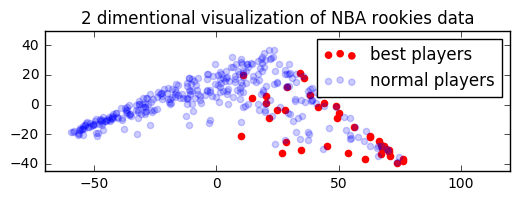

In [6]:
f1 = plt.figure(1)  
plt.subplot(211) 
plt.xlim(-70, 120)
plt.ylim(-45, 50)
for n in range(0,38):
    if n == 0:
        plt.scatter(allstar[n,0],allstar[n,1], label = "best players", color='red')
    else:
        plt.scatter(allstar[n,0],allstar[n,1],  color='red')
    
      
for j in range(0,324):
    if j == 0:
        plt.scatter(normal[j,0],normal[j,1], label = "normal players", color='blue', alpha=0.2)
    else:
        plt.scatter(normal[j,0],normal[j,1], color='blue', alpha=0.2)
     
    
plt.legend()
plt.title('2 dimentional visualization of NBA rookies data')
plt.savefig("pca_2d.png",dpi=600)
plt.show()

PCA processing

In [7]:
lowDDataMat,reconMat,n = pca(x)
print('auto choose '+str(n)+' dimentional')
lowDDataMat

auto choose 5 dimentional


matrix([[ 67.3939413 , -33.46531087, -15.79719806,  -8.28791322,
          -0.60245306],
        [ 49.98856825,  -5.29865701, -11.4762951 ,  -0.88899878,
           4.15915392],
        [ 34.7689933 , -30.8068029 ,  -7.11889109, -11.99063859,
           6.54595964],
        ...,
        [-38.2926716 ,  -4.07021669,   0.35838488,  10.02060975,
           2.96845523],
        [-53.18628675, -12.76257674,  -3.67172757,  10.32338141,
           5.00813563],
        [-59.59084436, -17.24619375,  -0.93833256,  21.09298913,
          15.47482698]])

# rookies pca

In [8]:
df2 = pd.read_csv("2017rookies_data.csv", header=None, encoding='utf-8')
#df1 = df1.astype(float)
ds1 = df2.values
x1 = ds1[:,0:23]
df2

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,36,28,30.9,0.44,6.8,15.4,2.2,6.2,0.86,2.6,...,3.4,1.5,0.4,2.6,3.2,18.3,15,21,16.5,0.073
1,36,20,32.0,0.47,6.6,13.9,2.1,5.3,0.74,2.3,...,1.7,0.4,0.4,1.9,2.2,17.5,11,25,15.7,0.096
2,35,35,29.7,0.42,5.4,12.9,2.2,6.4,0.83,1.9,...,1.3,0.5,0.5,1.3,1.6,14.9,10,25,14.8,0.072
3,41,41,31.1,0.51,4.7,9.4,1.4,3.0,0.83,3.2,...,1.4,0.9,0.8,1.3,2.1,14.1,31,10,16.8,0.182
4,31,31,27.8,0.39,5.4,13.7,1.5,4.7,0.68,1.5,...,4.4,0.8,0.2,2.8,2.0,13.8,12,19,11.9,-0.032
5,31,4,22.9,0.59,4.6,7.9,0.0,0.1,0.72,1.9,...,1.1,0.7,1.1,1.4,3.2,11.1,8,23,21.1,0.169
6,31,31,33.9,0.35,3.9,11.1,1.5,5.1,0.48,0.8,...,7.1,1.4,1.0,2.9,2.2,10.0,11,20,11.3,0.017
7,30,18,25.4,0.40,3.9,9.6,0.4,1.4,0.68,1.5,...,3.7,0.9,0.2,2.3,2.2,9.7,10,20,9.5,-0.053
8,39,13,21.7,0.39,3.4,8.9,0.6,2.3,0.56,1.7,...,1.1,1.0,0.3,1.7,2.7,9.2,14,25,8.0,-0.053
9,38,30,27.4,0.45,3.0,6.6,0.9,2.4,0.74,0.9,...,1.1,0.7,0.3,1.1,3.1,7.8,12,26,8.0,0.035


In [9]:
lowDDataMat3,reconMat3,n3 = pca(x1)
print('auto choose '+str(n3)+' dimentional')
lowDDataMat3

auto choose 6 dimentional


matrix([[ 2.86774131e+01,  7.61163977e+00, -4.63211324e+00,
         -6.93006488e+00,  2.90311015e+00,  6.30975540e+00],
        [ 2.44587007e+01,  3.20641431e+00, -1.18108574e+01,
         -5.63227444e+00,  4.68462563e+00,  2.95564383e+00],
        [ 3.13790458e+01,  1.23924972e+01, -5.69553265e+00,
          8.19676324e-01, -5.27475924e-01,  1.26796106e+00],
        [ 3.75234763e+01,  7.89866890e+00,  1.75193772e+01,
         -1.18991167e+01, -8.01990739e-01,  1.07047175e-01],
        [ 2.38921171e+01,  1.18969253e+01, -2.62820714e+00,
         -3.25191254e+00, -3.07983426e+00,  3.08609028e+00],
        [ 5.96702655e+00, -3.97351993e+00, -1.09224470e+01,
         -6.28148676e-01,  1.31448691e+01, -2.00991190e+00],
        [ 2.52661978e+01,  1.21713595e+01, -5.20597005e+00,
         -5.36296468e+00, -4.04495650e+00, -4.62391453e+00],
        [ 1.26656882e+01,  3.00998089e+00, -6.15977043e+00,
         -1.87486412e+00, -2.57695804e+00, -4.55424576e-01],
        [ 1.55251113e+01, -8.869